<a href="https://colab.research.google.com/github/Jospina1001/Artificial-Intelligence/blob/main/Corte1_Taller2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# __Laboratorio 2: Búsqueda no informada__

El siguiente taller de corresponde a la aplicación de algoritmos de búsqueda no informada en la solución de problemas en inteligencia artificial. Para el desarrollo del laboratorio tenga en cuenta lo siguiente:

* La actividad puede realizarse en grupos de máximo 4 personas
* La solución al taller debe enviarse en un notebook a través de Moodle. Se debe adjuntar el archivo. No se aceptan enlaces
* El objetivo del taller es hacer énfasis en el proceso de modelamiento. Por esta razón se deben utilizar como base para la soluciones propuestas las clases y métodos disponibles en la sección recursos. __Otras implementaciones no serán tenidas en cuenta__.
* Si se detecta cualquier tipo de fraude, la calificación de 0.0.
* El taller deberá ser sustentando por uno de los miembros del grupo
* Las soluciones propuestas deben cumplir con las recomendaciones de código limpio especificadas en el [PEP8](https://pep8.org/), de lo contrario será penalizado

## __0. Recursos__

La clase abstracta `SearchProblem` servirá como una plantilla general para el proceso de formulación del problema como un problema de búsqueda. Cualquier implementación deberá heredar de esta clase

In [1]:
global estados_visitados
estados_visitados=list()

class SearchProblem(object):
    """The abstract class for a formal problem. A new domain subclasses this,
    overriding `actions` and `results`, and perhaps other methods.
    The default heuristic is 0 and the default action cost is 1 for all states.
    When you create an instance of a subclass, specify `initial`, and `goal` states 
    (or give an `is_goal` method) and perhaps other keyword args for the subclass."""

    def __init__(self, initial, goal=None, **kwds): 
        """The constructor specifies the initial state, and possibly a goal
        state, if there is a unique goal. Your subclass's constructor can add
        other arguments."""
        self.initial = initial
        self.goal = goal

    def actions(self, node):
        """Return the actions that can be executed in the given
        state. The result would typically be a list, but if there are
        many actions, consider yielding them one at a time in an
        iterator, rather than building them all at once."""        
        raise NotImplementedError
        
    def result(self, node, action): 
        """Return the state that results from executing the given
        action in the given state. The action must be one of
        self.actions(state)."""
        raise NotImplementedError
        
    def is_goal(self, node): 
        """Return True if the state is a goal. The default method compares the
        state to self.goal or checks for state in self.goal if it is a
        list, as specified in the constructor. Override this method if
        checking against a single self.goal is not enough."""      
        return self.goal == node
    
    def action_cost(self, s, a, s1): 
        """Return the cost of a solution path that arrives at state s1 from
        state s via action a. If the problem
        is such that the path doesn't matter, this function will only look at
        state s1.  If the path does matter, it will consider state s1
        and action a. The default method costs 1 for every step in the path."""
        return 1

También es posible implementar la clase abstracta `Node` para representar los posibles estados del problemas.

In [2]:
class Node:
    def __init__(self, state='', parent=None, action=None, cost=1):
        self.state = state
        self.parent = parent
        self.action = action

    def states_path(self):   
        if self.parent == None:
            return [self]
        return self.parent.states_path() + [self]
    
    def actions_path(self):
        if self.parent == None:
            return []
        return self.parent.actions_path() + [self.action]        

    def __eq__(self, node):
        if node:
            return self.state == node.state
        return False    

    def __repr__(self):
        return self.state  

Una implementación de los algoritmos `BFS` y `DFS` tal como se vió en clase.

In [3]:
def expand(problem, node):
    childs = []
    for action in problem.actions(node):
        childs.append(problem.result(node, action))
    return childs    

def BFS(problem, fringe=[]):
    closed = []
    fringe.append(problem.initial)

    while(True):
        node = fringe.pop(0)
        if problem.is_goal(node): 
            estados_visitados.clear()
            return node
        if node not in closed: 
            closed.append(node)
        for child in expand(problem, node):
            fringe.append(child)

def DFS(problem, fringe=[]):
    closed = []
    fringe.append(problem.initial)

    while(True):
        node = fringe.pop()
        if problem.is_goal(node): 
            estados_visitados.clear()
            return node
        if node not in closed: 
            closed.append(node)
        for child in expand(problem, node):
            fringe.append(child)

## __1. (1.5 puntos) Problema de las Jarras de agua__

Usted tiene 2 jarras, una con capacidad de 3 litros y otra con capacidad de 5 litros. Además, cuenta con un grifo el cuál puede utilizar para llenar las jarras cuando lo requiera. Las jarras se pueden llenar totalmente o vaciar su contenido en el piso. También se puede vaciar el contenido de una jarra en la otra. Las jarras no tienen ninguna clase de marca. El objetivo es medir exactamente cuatro litros de agua. Considere el estado inicial como tener las dos jarras vacias.

* Construya una clase que herede de la clase `SearchProblem` para representar el problema
* Construya una clase que herede de la clase `Node` para representar las jarras
* Encuentre la solución al problema utilizando los algoritmos BFS y DFS
* Genere un gráfico de barras donde compare la cantidad de nodos expandidos por ambos algoritmos


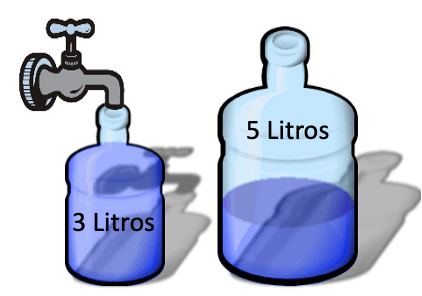




In [4]:
class Botellas(SearchProblem):

    def actions(self, node):
        frontera=list()

        lista=node.state.split(',')
        lista[0]=int(lista[0])
        lista[1]=int(lista[1])

        listaB=[0,0]


        if lista not in estados_visitados:
            res=1
            estados_visitados.append(lista)
        else:
            res=0

        if lista[0]<=3 and lista[0]>=0 and lista[1]<=5 and lista[1]>=0 and res==1:
            restriccion=1
        else:
            restriccion=0

        
        #Primera accion: llenar A
        if(lista[0]<3 and restriccion==1):
            
            listaB[0]=lista[0] + 3
            listaB[1]=lista[1]

            data='move-'+str(listaB[0])+','+str(listaB[1])
            if(data not in frontera):
                frontera.append(data)
        
        
        #Segunda accion: llenar B
        if(lista[1]<5 and restriccion==1):
            listaB[0]=lista[0]
            listaB[1]=lista[1] + 5 

            data='move-'+str(listaB[0])+','+str(listaB[1])
            if(data not in frontera):
                frontera.append(data)
        
        #tercera accion:vaciar a
        if(lista[0]!= 0 and restriccion==1):
            listaB[0]=0
            listaB[1]=lista[1]

            data='move-'+str(listaB[0])+','+str(listaB[1])
            if(data not in frontera):
                frontera.append(data)
        
        #cuarta accion: vaciar b
        if(lista[1]!= 0 and restriccion==1):
            listaB[1]=0
            listaB[0]=lista[0]

            data='move-'+str(listaB[0])+','+str(listaB[1])
            if(data not in frontera):
                frontera.append(data)
        
        #quinta accion vaciar a en b
        if(lista[0]>0 and lista[1]<=5 and restriccion==1):
            valor=lista[0]+lista[1]
            restante= valor - 5

            if restante > 0:
                valor -= restante

                listaB[0] = restante
                listaB[1] = valor
            elif restante == 0:

                listaB[0] = 0
                listaB[1] = 5
            elif restante <0:
                
                listaB[0] = 0
                listaB[1] = valor

            data='move-'+str(listaB[0])+','+str(listaB[1])
            if(data not in frontera):
                frontera.append(data)

        #sexta accion vaciar b en a
        if(lista[1]>0 and lista[0]<3 and restriccion==1):
            valor=lista[0]+lista[1]
            restante=listaB[0] - 3

            if restante>0:
                valor -= restante

                listaB[0] = valor
                listaB[1] = restante
            elif restante == 0:

                listaB[0] = 3
                listaB[1] = 0
            elif restante <0:

                listaB[0] = valor
                listaB[1] = 0

            data='move-'+str(listaB[0])+','+str(listaB[1])
            if(data not in frontera):
                frontera.append(data)

        actions = {
                node.state: frontera,
        }
        return actions[node.state]

    def result(self, node, action):
        new_state=dict()
        action_result=action[5:]

        for i in action:
            new_state[action]=action_result
            
        return Node(state=new_state[action], parent=node, action=action)

    def is_goal(self, node):
        return node == self.goal



In [5]:
S = Node(state='0,0')
G = Node(state='0,4')

estados_visitados.clear()

problema = Botellas(initial=S, goal=G)

solutionBFS = BFS(problema)  
print('solution BFS:',solutionBFS)
print('State sequence:',solutionBFS.states_path())
print('Action sequence:',solutionBFS.actions_path(),'\n')


solutionDFS = DFS(problema)  
print('solution DFS:',solutionDFS)
print('State sequence:',solutionDFS.states_path())
print('Action sequence:',solutionDFS.actions_path(),'\n')

solution BFS: 0,4
State sequence: [0,0, 3,0, 0,3, 3,3, 1,5, 1,0, 0,1, 3,1, 0,4]
Action sequence: ['move-3,0', 'move-0,3', 'move-3,3', 'move-1,5', 'move-1,0', 'move-0,1', 'move-3,1', 'move-0,4'] 

solution DFS: 0,4
State sequence: [0,0, 0,5, 3,5, 3,0, 0,3, 3,3, 1,5, 1,0, 0,1, 3,1, 0,4]
Action sequence: ['move-0,5', 'move-3,5', 'move-3,0', 'move-0,3', 'move-3,3', 'move-1,5', 'move-1,0', 'move-0,1', 'move-3,1', 'move-0,4'] 



## __2. (2.0 puntos) Canibales y misioneros__

Tres misioneros y tres caníbales deben cruzar un río usando un bote que puede llevar una o dos personas. Sin embargo, para cruzar el rio se deben tener en cuenta dos restricciones: primero, si hay misioneros presentes en un lado, no pueden ser superados en número por los caníbales (¡si esto ocurriera, los caníbales se comerían a los misioneros!). Segundo, el barco no puede cruzar el río vacio. Su objetivo es modelar esta situación como un problema de búsqueda y resolverlo usando BFS y DFS. Para esto:

* Construya una clase que herede de la clase `SearchProblem` para representar el problema
* Construya una clase que herede de la clase `Node` para representar los estados
* Genere un gráfico de barras donde compare la cantidad de nodos expandidos por ambos algoritmos

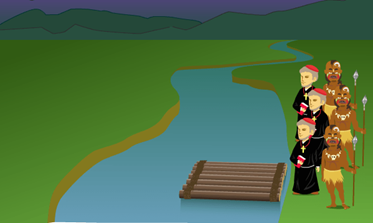


In [6]:
class MisionerosCanivales(SearchProblem):

    def actions(self, node):
        frontera=list()
        listaB=list()
        listaB.append([0,0])
        listaB.append([0,0])
        listaB.append('')

        try:
            if len(node.state)==0:
                lista=[[0,0],[0,0],'']
                res=0
            else:
                res=1
                lista=node.state.split('-')
                lista[0]= list(map(int, lista[0].split(',')))
                lista[1]= list(map(int, lista[1].split(',')))
        except:
            lista=[[0,0],[0,0],'']
            res=0

        if lista not in estados_visitados:
          estados_visitados.append(lista)
        else:
          res=0


        if max(lista[0])<4 and max(lista[1])<4 and min(lista[0])>=0 and min(lista[1])>=0 and res==1:
            restriccion=1
        else:
            restriccion=0

        if ((lista[2] == 'D') and (restriccion==1)):
        
            #---------------PROCESO MAT------------------#

            #primer movimiento 1M-1C
            listaB[0][0]= lista[0][0] + 1
            listaB[0][1]= lista[0][1] + 1

            listaB[1][0]= lista[1][0] - 1
            listaB[1][1]= lista[1][1] - 1

                
            if (listaB[0][0]<=listaB[0][1] or listaB[0][0]==0) and (listaB[1][0]<=listaB[1][1] or listaB[1][0]==0): #restriccion
                #agrego a la lista la cadena de la lista B
                data='move-'+str(listaB[0][0])+','+str(listaB[0][1])+'-'+str(listaB[1][0])+','+str(listaB[1][1])+'-'+'I'
                frontera.append(data)
                data=''
            #-------------------------------------------------------------#
            #segundo movimiento posible 2M-0C 
            listaB[0][0]= lista[0][0] + 2
            listaB[0][1]= lista[0][1]

            listaB[1][0]= lista[1][0] - 2
            listaB[1][1]= lista[1][1]
            if (listaB[0][0]>=listaB[0][1] or listaB[0][0]==0) and (listaB[1][0]>=listaB[1][1] or listaB[1][0]==0): #restriccion
                #agrego a la lista la cadena de la lista B
                data='move-'+str(listaB[0][0])+','+str(listaB[0][1])+'-'+str(listaB[1][0])+','+str(listaB[1][1])+'-'+'I'
                frontera.append(data)
                data=''
            #-------------------------------------------------------------#
            #tercer movimiento posible 0M-2C
            listaB[0][0]= lista[0][0]
            listaB[0][1]= lista[0][1] + 2

            listaB[1][0]= lista[1][0]
            listaB[1][1]= lista[1][1] - 2
                
            if (listaB[0][0]>=listaB[0][1] or listaB[0][0]==0) and (listaB[1][0]>=listaB[1][1] or listaB[1][0]==0): #restriccion
                #agrego a la lista la cadena de la lista B
                data='move-'+str(listaB[0][0])+','+str(listaB[0][1])+'-'+str(listaB[1][0])+','+str(listaB[1][1])+'-'+'I'
                frontera.append(data)
                data=''
            #-------------------------------------------------------------#
            #cuarto movimiento posible 0M-1C
            listaB[0][0]= lista[0][0]
            listaB[0][1]= lista[0][1] + 1

            listaB[1][0]= lista[1][0]
            listaB[1][1]= lista[1][1] - 1
                
            if (listaB[0][0]>=listaB[0][1] or listaB[0][0]==0) and (listaB[1][0]>=listaB[1][1] or listaB[1][0]==0): #restriccion
                #agrego a la lista la cadena de la lista B
                data='move-'+str(listaB[0][0])+','+str(listaB[0][1])+'-'+str(listaB[1][0])+','+str(listaB[1][1])+'-'+'I'
                frontera.append(data)
                data=''
            #listaB = [[0,0],[0,0],'']
            #-------------------------------------------------------------#
            #quinto movimiento posible 1M-0C
            listaB[0][0]= lista[0][0] + 1
            listaB[0][1]= lista[0][1] 

            listaB[1][0]= lista[1][0] - 1
            listaB[1][1]= lista[1][1]
                
            if (listaB[0][0]>=listaB[0][1] or listaB[0][0]==0) and (listaB[1][0]>=listaB[1][1] or listaB[1][0]==0): #restriccion
                #agrego a la lista la cadena de la lista B
                data='move-'+str(listaB[0][0])+','+str(listaB[0][1])+'-'+str(listaB[1][0])+','+str(listaB[1][1])+'-'+'I'
                frontera.append(data)
                data=''
            #listaB = [[0,0],[0,0],'']

        elif ((lista[2] == 'I') and (restriccion==1)):
            
        #---------------PROCESO MAT------------------#
            #primer movimiento 1M-1C
            listaB[0][0]= lista[0][0] - 1
            listaB[0][1]= lista[0][1] - 1

            listaB[1][0]= lista[1][0] + 1
            listaB[1][1]= lista[1][1] + 1
            if (listaB[0][0]>=listaB[0][1] or listaB[0][0]==0) and (listaB[1][0]>=listaB[1][1] or listaB[1][0]==0): #restriccion
                #agrego a la lista la cadena de la lista B
                data='move-'+str(listaB[0][0])+','+str(listaB[0][1])+'-'+str(listaB[1][0])+','+str(listaB[1][1])+'-'+'D'
                frontera.append(data)
                data=''
            #listaB = [[0,0],[0,0],'']
            #-------------------------------------------------------------#
            #segundo movimiento posible 2M-0C 
            listaB[0][0]= lista[0][0] - 2
            listaB[0][1]= lista[0][1]

            listaB[1][0]= lista[1][0] + 2
            listaB[1][1]= lista[1][1]

            if (listaB[0][0]>=listaB[0][1] or listaB[0][0]==0) and (listaB[1][0]>=listaB[1][1] or listaB[1][0]==0): #restriccion
                #agrego a la lista la cadena de la lista B
                data='move-'+str(listaB[0][0])+','+str(listaB[0][1])+'-'+str(listaB[1][0])+','+str(listaB[1][1])+'-'+'D'
                frontera.append(data)
                data=''
            #listaB = [[0,0],[0,0],'']

            #-------------------------------------------------------------#
            #tercer movimiento posible 0M-2C
            listaB[0][0]= lista[0][0]
            listaB[0][1]= lista[0][1] - 2

            listaB[1][0]= lista[1][0]
            listaB[1][1]= lista[1][1] + 2
                
            if (listaB[0][0]>=listaB[0][1] or listaB[0][0]==0) and (listaB[1][0]>=listaB[1][1] or listaB[1][0]==0): #restriccion
                #agrego a la lista la cadena de la lista B
                data='move-'+str(listaB[0][0])+','+str(listaB[0][1])+'-'+str(listaB[1][0])+','+str(listaB[1][1])+'-'+'D'
                frontera.append(data)
                data=''
            #listaB = [[0,0],[0,0],'']

            #-------------------------------------------------------------#
            #cuarto movimiento posible 0M-1C
            listaB[0][0]= lista[0][0]
            listaB[0][1]= lista[0][1] - 1

            listaB[1][0]= lista[1][0]
            listaB[1][1]= lista[1][1] + 1
                
            if (listaB[0][0]>=listaB[0][1] or listaB[0][0]==0) and (listaB[1][0]>=listaB[1][1] or listaB[1][0]==0): #restriccion
                #agrego a la lista la cadena de la lista B
                data='move-'+str(listaB[0][0])+','+str(listaB[0][1])+'-'+str(listaB[1][0])+','+str(listaB[1][1])+'-'+'D'
                frontera.append(data)
                data=''
            #listaB = [[0,0],[0,0],'']
            #-------------------------------------------------------------#
            #quinto movimiento posible 1M-0C
            listaB[0][0]= lista[0][0] - 1
            listaB[0][1]= lista[0][1] 

            listaB[1][0]= lista[1][0] + 1
            listaB[1][1]= lista[1][1]
                
            if (listaB[0][0]>=listaB[0][1] or listaB[0][0]==0) and (listaB[1][0]>=listaB[1][1] or listaB[1][0]==0): #restriccion
                #agrego a la lista la cadena de la lista B
                data='move-'+str(listaB[0][0])+','+str(listaB[0][1])+'-'+str(listaB[1][0])+','+str(listaB[1][1])+'-'+'D'
                frontera.append(data)
                data=''
            #listaB = [[0,0],[0,0],'']
        else:
            frontera=[]
        
        actions = {
            node.state: frontera
        }
        
        return actions[node.state]

    def result(self, node, action):

        new_state=dict()
        action_result=action[5:]

        for i in action:
            new_state[action]=action_result

        return Node(state=new_state[action], parent=node, action=action)

    def is_goal(self, node):
        return node == self.goal 



Combinaciones posibles:

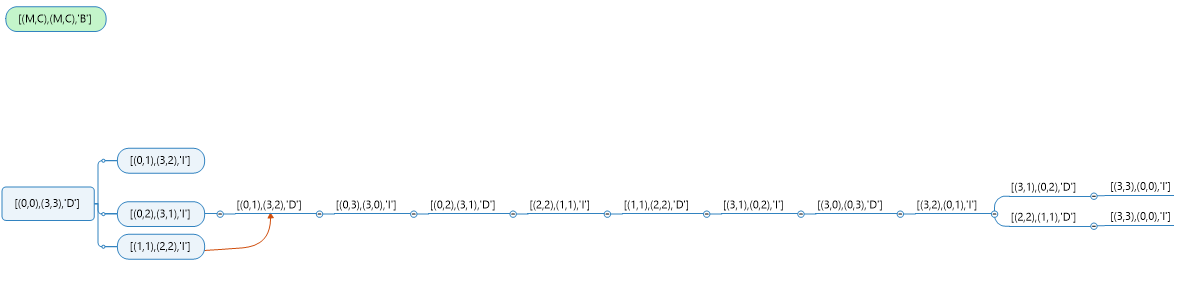

In [7]:

S = Node(state='0,0-3,3-D')
G = Node(state='3,3-0,0-I')

problema = MisionerosCanivales(initial=S, goal=G)

solutionBFS = BFS(problema)  
print('solution BFS:',solutionBFS)
print('State sequence:',solutionBFS.states_path())
print('Action sequence:',solutionBFS.actions_path(),'\n')



solutionDFS = DFS(problema)  
print('solution DFS:',solutionDFS)
print('State sequence:',solutionDFS.states_path())
print('Action sequence:',solutionDFS.actions_path(),'\n')




solution BFS: 3,3-0,0-I
State sequence: [0,0-3,3-D, 1,1-2,2-I, 0,1-3,2-D, 0,3-3,0-I, 0,2-3,1-D, 2,2-1,1-I, 1,1-2,2-D, 3,1-0,2-I, 3,0-0,3-D, 3,2-0,1-I, 3,1-0,2-D, 3,3-0,0-I]
Action sequence: ['move-1,1-2,2-I', 'move-0,1-3,2-D', 'move-0,3-3,0-I', 'move-0,2-3,1-D', 'move-2,2-1,1-I', 'move-1,1-2,2-D', 'move-3,1-0,2-I', 'move-3,0-0,3-D', 'move-3,2-0,1-I', 'move-3,1-0,2-D', 'move-3,3-0,0-I'] 

solution DFS: 3,3-0,0-I
State sequence: [0,0-3,3-D, 0,2-3,1-I, 0,1-3,2-D, 0,3-3,0-I, 0,2-3,1-D, 2,2-1,1-I, 1,1-2,2-D, 3,1-0,2-I, 3,0-0,3-D, 3,2-0,1-I, 2,2-1,1-D, 3,3-0,0-I]
Action sequence: ['move-0,2-3,1-I', 'move-0,1-3,2-D', 'move-0,3-3,0-I', 'move-0,2-3,1-D', 'move-2,2-1,1-I', 'move-1,1-2,2-D', 'move-3,1-0,2-I', 'move-3,0-0,3-D', 'move-3,2-0,1-I', 'move-2,2-1,1-D', 'move-3,3-0,0-I'] 



# __3. (1.5 puntos) Pacman__

Para el proyecto de búsqueda asociado al curso de IA de Berkeley disponible [curso de IA de Berkeley](https://inst.eecs.berkeley.edu/~cs188/sp22/project1/) resuelva:

*   Question 1 (3 points): Finding a Fixed Food Dot using Depth First Search
*   Question 2 (3 points): Breadth First Search
*   Question 3 (3 points): Varying the Cost Function


Adjunte la implementación del método de búsqueda implementado en cada caso y una imagén con la evidencia de la aprobación de los casos de prueba utilizando el método` autograder.py`


In [ ]:
# Solución propuesta
"""
def depthFirstSearch(problem: SearchProblem):
    fringe = util.Stack()
    closed = set()

    start=problem.getStartState()
    fringe.push((start,list()))

    while not fringe.isEmpty():
        node = fringe.pop()
        if problem.isGoalState(node[0]): 
            return node[1]
        closed.add(node[0])
        for child in problem.getSuccessors(node[0]):
            if child[0] not in closed: 
                fringe.push((child[0],node[1] + [child[1]]))
    
    return []
    util.raiseNotDefined()

def breadthFirstSearch(problem: SearchProblem):
    fringe = util.Queue()
    closed = set()
    
    start=problem.getStartState()
    fringe.push((start,list()))
    closed.add(start)

    while not fringe.isEmpty():
        node = fringe.pop()
        if problem.isGoalState(node[0]): 
            return node[1]
        for child in problem.getSuccessors(node[0]):
            if child[0] not in closed: 
                closed.add(child[0])
                fringe.push((child[0],node[1] + [child[1]]))
    
    return []
    util.raiseNotDefined()

def uniformCostSearch(problem: SearchProblem):
    fringe = util.PriorityQueue()
    closed = set()

    start=problem.getStartState()
    fringe.push((start,list(),0),0)


    while not fringe.isEmpty():
            node = fringe.pop()
            if problem.isGoalState(node[0]): 
                return node[1]
            if node[0] not in closed:
                closed.add(node[0])
                for child in problem.getSuccessors(node[0]):
                    if child[0] not in closed: 
                        cost = node[2] + child[2]
                        fringe.push((child[0],node[1] + [child[1]],cost),cost)
    
    return []
"""



'\ndef depthFirstSearch(problem: SearchProblem):\n    fringe = util.Stack()\n    closed = set()\n\n    start=problem.getStartState()\n    fringe.push((start,list()))\n\n    while not fringe.isEmpty():\n        node = fringe.pop()\n        if problem.isGoalState(node[0]): \n            return node[1]\n        closed.add(node[0])\n        for child in problem.getSuccessors(node[0]):\n            if child[0] not in closed: \n                fringe.push((child[0],node[1] + [child[1]]))\n    \n    return []\n    util.raiseNotDefined()\n\ndef breadthFirstSearch(problem: SearchProblem):\n    fringe = util.Queue()\n    closed = set()\n    \n    start=problem.getStartState()\n    fringe.push((start,list()))\n    closed.add(start)\n\n    while not fringe.isEmpty():\n        node = fringe.pop()\n        if problem.isGoalState(node[0]): \n            return node[1]\n        for child in problem.getSuccessors(node[0]):\n            if child[0] not in closed: \n                closed.add(child[0])\n

autograde.py: 

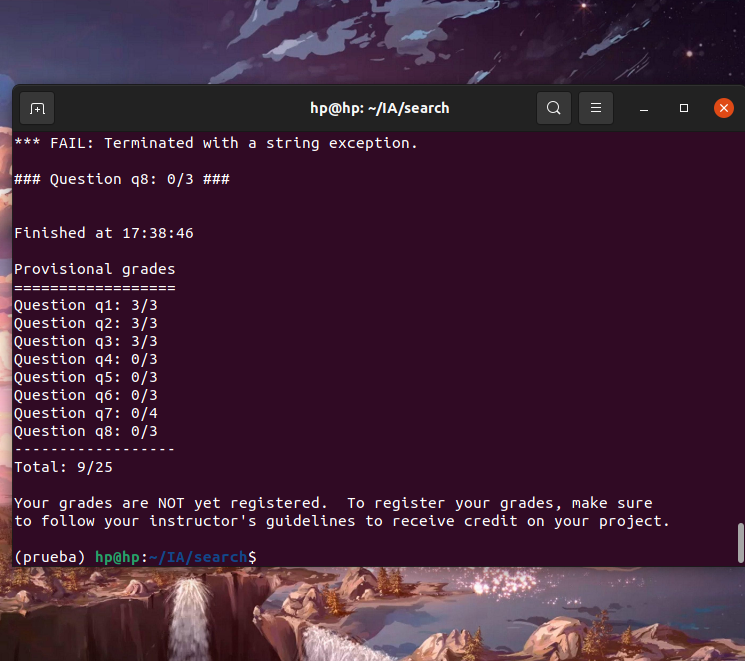

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7c4f3bb2-3938-4420-9558-cd3be27da22d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>